In [2]:
# For reading, visualizing, and preprocessing data
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import time
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, matthews_corrcoef, f1_score, precision_score, recall_score, cohen_kappa_score, log_loss, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Classifiers
from sklearn.svm import NuSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
# from tensorflow.keras.models import Sequential
#from mlxtend.classifier import StackingCVClassifier 

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense

# Used to ignore warnings generated from StackingCVClassifier
import warnings
warnings.simplefilter('ignore')

In [3]:
data = pd.read_csv("dataset_final.csv")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
numeric_data = data.copy()
numeric_data.drop(columns=numeric_data.columns[0],axis=1,inplace=True)

In [5]:
numeric_data

,dst_host_srv_count,logged_in,flag_SF,dst_host_same_srv_rate,service_http,same_srv_rate,service_private,dst_host_diff_srv_rate,count,dst_host_srv_serror_rate,dst_host_serror_rate,serror_rate,srv_serror_rate,flag_S0,service_eco_i,dst_host_same_src_port_rate,dst_host_srv_rerror_rate,srv_rerror_rate,rerror_rate,dst_host_rerror_rate,protocol_type_icmp,diff_srv_rate,flag_RSTR,dst_host_srv_diff_host_rate,service_domain_u,flag_REJ,dst_host_count,service_smtp,protocol_type_udp,label
0,-0.818890,-0.809262,1,-0.782367,0,0.771283,0,-0.280282,-0.717045,-0.624871,-0.639532,-0.637209,-0.631929,0,0,0.069972,-0.376387,-0.374432,-0.374362,-0.224532,0,-0.349683,0,-0.289103,0,0,-0.324063,0,0,0
1,-1.035688,-0.809262,1,-1.161030,0,-1.321428,0,2.736852,-0.620982,-0.624871,-0.639532,-0.637209,-0.631929,0,0,2.367737,-0.376387,-0.374432,-0.374362,-0.387635,0,0.482201,0,-0.289103,0,0,0.734343,0,1,0
2,-0.809857,-0.809262,0,-0.938287,0,-1.389669,1,-0.174417,0.339648,1.618955,1.608759,1.602664,1.605104,1,0,-0.480197,-0.376387,-0.374432,-0.374362,-0.387635,0,0.038529,0,-0.289103,0,0,0.734343,0,0,1
3,1.258754,1.235694,1,1.066401,1,0.771283,0,-0.439078,-0.690846,-0.602433,-0.572083,-0.189235,-0.184522,0,0,-0.383108,-0.345084,-0.374432,-0.374362,-0.387635,0,-0.349683,0,0.066252,0,0,-1.533670,0,0,0
4,1.258754,1.235694,1,1.066401,1,0.771283,0,-0.439078,-0.472521,-0.624871,-0.639532,-0.637209,-0.631929,0,0,-0.480197,-0.376387,-0.374432,-0.374362,-0.387635,0,-0.349683,0,-0.289103,0,0,0.734343,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336710,-1.015837,1.235694,1,-1.125420,0,0.771283,0,-0.333214,-0.725778,-0.289010,-0.639532,-0.637209,-0.631929,0,0,-0.480197,0.092164,-0.374432,-0.374362,1.941299,0,-0.349683,0,-0.289103,0,0,0.734343,0,0,4
336711,-0.319219,1.235694,1,1.066401,0,0.771283,0,-0.439078,-0.709809,-0.624871,-0.639532,-0.637209,-0.631929,0,0,2.756092,-0.376387,-0.374432,-0.374362,-0.387635,0,-0.349683,0,-0.050515,0,0,-1.798343,0,0,4
336712,-1.035688,1.235694,1,1.066401,0,0.771283,0,-0.439078,-0.725778,-0.624871,-0.639532,-0.637209,-0.631929,0,0,2.756092,-0.376387,-0.374432,-0.374362,-0.387635,0,-0.349683,0,-0.289103,0,0,-1.825991,0,0,4
336713,-1.019191,1.235694,1,1.066401,0,0.771283,0,-0.439078,-0.713438,-0.624871,-0.639532,-0.637209,-0.631929,0,0,2.756092,-0.376387,-0.374432,-0.374362,-0.387635,0,-0.349683,0,-0.289103,0,0,-1.807583,0,0,4


In [6]:
categorical = pd.get_dummies(numeric_data['label'])
categorical

,0,1,2,3,4
0,1,0,0,0,0
1,1,0,0,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
336710,0,0,0,0,1
336711,0,0,0,0,1
336712,0,0,0,0,1
336713,0,0,0,0,1


In [7]:
categorical.rename(columns = {0 : 'normal', 1 : 'Dos' ,2: 'Probe',3: 'R2L',4 :'U2R'}, inplace = True)
categorical

,normal,Dos,Probe,R2L,U2R
0,1,0,0,0,0
1,1,0,0,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
336710,0,0,0,0,1
336711,0,0,0,0,1
336712,0,0,0,0,1
336713,0,0,0,0,1


In [8]:
numeric_data.drop('label',inplace=True, axis=1)
numeric_data=numeric_data.join(categorical)

numeric_data

,dst_host_srv_count,logged_in,flag_SF,dst_host_same_srv_rate,service_http,same_srv_rate,service_private,dst_host_diff_srv_rate,count,dst_host_srv_serror_rate,dst_host_serror_rate,serror_rate,srv_serror_rate,flag_S0,service_eco_i,dst_host_same_src_port_rate,dst_host_srv_rerror_rate,srv_rerror_rate,rerror_rate,dst_host_rerror_rate,protocol_type_icmp,diff_srv_rate,flag_RSTR,dst_host_srv_diff_host_rate,service_domain_u,flag_REJ,dst_host_count,service_smtp,protocol_type_udp,normal,Dos,Probe,R2L,U2R
0,-0.818890,-0.809262,1,-0.782367,0,0.771283,0,-0.280282,-0.717045,-0.624871,-0.639532,-0.637209,-0.631929,0,0,0.069972,-0.376387,-0.374432,-0.374362,-0.224532,0,-0.349683,0,-0.289103,0,0,-0.324063,0,0,1,0,0,0,0
1,-1.035688,-0.809262,1,-1.161030,0,-1.321428,0,2.736852,-0.620982,-0.624871,-0.639532,-0.637209,-0.631929,0,0,2.367737,-0.376387,-0.374432,-0.374362,-0.387635,0,0.482201,0,-0.289103,0,0,0.734343,0,1,1,0,0,0,0
2,-0.809857,-0.809262,0,-0.938287,0,-1.389669,1,-0.174417,0.339648,1.618955,1.608759,1.602664,1.605104,1,0,-0.480197,-0.376387,-0.374432,-0.374362,-0.387635,0,0.038529,0,-0.289103,0,0,0.734343,0,0,0,1,0,0,0
3,1.258754,1.235694,1,1.066401,1,0.771283,0,-0.439078,-0.690846,-0.602433,-0.572083,-0.189235,-0.184522,0,0,-0.383108,-0.345084,-0.374432,-0.374362,-0.387635,0,-0.349683,0,0.066252,0,0,-1.533670,0,0,1,0,0,0,0
4,1.258754,1.235694,1,1.066401,1,0.771283,0,-0.439078,-0.472521,-0.624871,-0.639532,-0.637209,-0.631929,0,0,-0.480197,-0.376387,-0.374432,-0.374362,-0.387635,0,-0.349683,0,-0.289103,0,0,0.734343,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336710,-1.015837,1.235694,1,-1.125420,0,0.771283,0,-0.333214,-0.725778,-0.289010,-0.639532,-0.637209,-0.631929,0,0,-0.480197,0.092164,-0.374432,-0.374362,1.941299,0,-0.349683,0,-0.289103,0,0,0.734343,0,0,0,0,0,0,1
336711,-0.319219,1.235694,1,1.066401,0,0.771283,0,-0.439078,-0.709809,-0.624871,-0.639532,-0.637209,-0.631929,0,0,2.756092,-0.376387,-0.374432,-0.374362,-0.387635,0,-0.349683,0,-0.050515,0,0,-1.798343,0,0,0,0,0,0,1
336712,-1.035688,1.235694,1,1.066401,0,0.771283,0,-0.439078,-0.725778,-0.624871,-0.639532,-0.637209,-0.631929,0,0,2.756092,-0.376387,-0.374432,-0.374362,-0.387635,0,-0.349683,0,-0.289103,0,0,-1.825991,0,0,0,0,0,0,1
336713,-1.019191,1.235694,1,1.066401,0,0.771283,0,-0.439078,-0.713438,-0.624871,-0.639532,-0.637209,-0.631929,0,0,2.756092,-0.376387,-0.374432,-0.374362,-0.387635,0,-0.349683,0,-0.289103,0,0,-1.807583,0,0,0,0,0,0,1


In [9]:
numeric_data.iloc[:,0:29]

,dst_host_srv_count,logged_in,flag_SF,dst_host_same_srv_rate,service_http,same_srv_rate,service_private,dst_host_diff_srv_rate,count,dst_host_srv_serror_rate,dst_host_serror_rate,serror_rate,srv_serror_rate,flag_S0,service_eco_i,dst_host_same_src_port_rate,dst_host_srv_rerror_rate,srv_rerror_rate,rerror_rate,dst_host_rerror_rate,protocol_type_icmp,diff_srv_rate,flag_RSTR,dst_host_srv_diff_host_rate,service_domain_u,flag_REJ,dst_host_count,service_smtp,protocol_type_udp
0,-0.818890,-0.809262,1,-0.782367,0,0.771283,0,-0.280282,-0.717045,-0.624871,-0.639532,-0.637209,-0.631929,0,0,0.069972,-0.376387,-0.374432,-0.374362,-0.224532,0,-0.349683,0,-0.289103,0,0,-0.324063,0,0
1,-1.035688,-0.809262,1,-1.161030,0,-1.321428,0,2.736852,-0.620982,-0.624871,-0.639532,-0.637209,-0.631929,0,0,2.367737,-0.376387,-0.374432,-0.374362,-0.387635,0,0.482201,0,-0.289103,0,0,0.734343,0,1
2,-0.809857,-0.809262,0,-0.938287,0,-1.389669,1,-0.174417,0.339648,1.618955,1.608759,1.602664,1.605104,1,0,-0.480197,-0.376387,-0.374432,-0.374362,-0.387635,0,0.038529,0,-0.289103,0,0,0.734343,0,0
3,1.258754,1.235694,1,1.066401,1,0.771283,0,-0.439078,-0.690846,-0.602433,-0.572083,-0.189235,-0.184522,0,0,-0.383108,-0.345084,-0.374432,-0.374362,-0.387635,0,-0.349683,0,0.066252,0,0,-1.533670,0,0
4,1.258754,1.235694,1,1.066401,1,0.771283,0,-0.439078,-0.472521,-0.624871,-0.639532,-0.637209,-0.631929,0,0,-0.480197,-0.376387,-0.374432,-0.374362,-0.387635,0,-0.349683,0,-0.289103,0,0,0.734343,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336710,-1.015837,1.235694,1,-1.125420,0,0.771283,0,-0.333214,-0.725778,-0.289010,-0.639532,-0.637209,-0.631929,0,0,-0.480197,0.092164,-0.374432,-0.374362,1.941299,0,-0.349683,0,-0.289103,0,0,0.734343,0,0
336711,-0.319219,1.235694,1,1.066401,0,0.771283,0,-0.439078,-0.709809,-0.624871,-0.639532,-0.637209,-0.631929,0,0,2.756092,-0.376387,-0.374432,-0.374362,-0.387635,0,-0.349683,0,-0.050515,0,0,-1.798343,0,0
336712,-1.035688,1.235694,1,1.066401,0,0.771283,0,-0.439078,-0.725778,-0.624871,-0.639532,-0.637209,-0.631929,0,0,2.756092,-0.376387,-0.374432,-0.374362,-0.387635,0,-0.349683,0,-0.289103,0,0,-1.825991,0,0
336713,-1.019191,1.235694,1,1.066401,0,0.771283,0,-0.439078,-0.713438,-0.624871,-0.639532,-0.637209,-0.631929,0,0,2.756092,-0.376387,-0.374432,-0.374362,-0.387635,0,-0.349683,0,-0.289103,0,0,-1.807583,0,0


 ## Network type: Multilayer Perceptron (MLP)
Number of hidden layers: 2
Total layers: 4 (two hidden layers + input layer + output layer)
Input shape: (29, ) 
Hidden layer 1: 20 nodes, ReLU activation
##Hidden layer 2: 20 nodes, ReLU activation
Output layer: 5 nodes, Softmax activation

In [10]:
X = numeric_data.iloc[:,0:29] # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = numeric_data[['Dos','normal','Probe','R2L','U2R']] # target attributes


In [11]:
# X = numeric_data.iloc[:,0:30]  # dataset excluding target attribute (encoded, one-hot-encoded,original)
# Y = numeric_data[['Dos','normal','Probe','R2L','U2R']] # target attributes

# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

mlp = Sequential() # initializing model
# input layer and first layer with 20 neurons
mlp.add(InputLayer(input_shape=(29, ))) # input layer
#first layer with 50 neurons
mlp.add(Dense(units=20, input_dim=X_train.shape[1], activation='relu'))
mlp.add(Dense(units=20, input_dim=X_train.shape[1], activation='relu'))
# output layer with softmax activation
mlp.add(Dense(units=5,activation='softmax'))

mlp.summary()
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# training time
begin = time.time()
# training the model on training dataset
history = mlp.fit(X_train, y_train, epochs=50, batch_size=5000,validation_split=0.2)
# store end time
end = time.time()
# predicting target attribute on testing dataset
test_results = mlp.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                600       
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 5)                 105       
                                                                 
Total params: 1,125
Trainable params: 1,125
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
41/41 [==============================] - 3s 13ms/step - loss: 1.5094 - accuracy: 0.2955 - val_loss: 1.2193 - val_accuracy: 0.5640
Epoch 2/50
41/41 [==============================] - 0s 6ms/step - loss: 1.0232 - accuracy: 0.6082 - val_loss: 0.8216 - val_accuracy: 0.6857
Epoch 3/50
41/41 [===================

#### When we mention validation_split as parameter while fitting deep learning model, it splits data into two parts for every epoch i.e. training data and validation data. It trains the model on training data and validate the model on validation data by checking its loss and accuracy. Now, we can evaluate model while training parallely with the dataset.

In [27]:
y_test

,Dos,normal,Probe,R2L,U2R
378,0,1,0,0,0
32038,1,0,0,0,0
86399,1,0,0,0,0
74412,1,0,0,0,0
52951,0,0,1,0,0
...,...,...,...,...,...
100955,0,1,0,0,0
77744,0,1,0,0,0
17242,0,1,0,0,0
118703,0,0,1,0,0


In [23]:
pred

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
# From input layer to the first hidden layer: 93 x 50 + 50 = 4700
# From the first hidden layer to the second hidden layer: 50 x 50 + 50 = 2550
# From the second hidden layer to the output layer: 5 x 50 + 5 = 255
# Total trainable parameters: 4700+ 2550+ 255 = 7505

In [19]:

# list all data in history
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


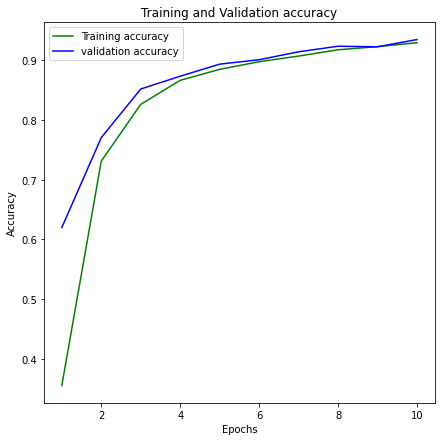

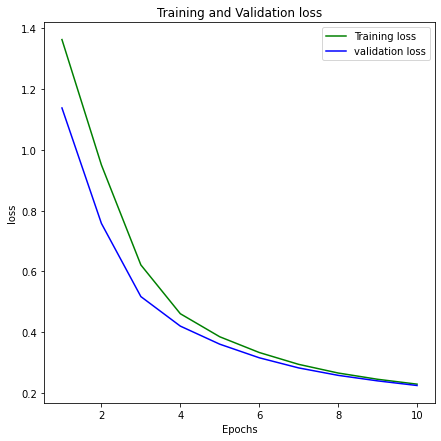

In [20]:
accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(accuracy)+1)

f = plt.figure()
f.set_figwidth(7)
f.set_figheight(7)

plt.plot(epochs, accuracy, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

f = plt.figure()
f.set_figwidth(7)
f.set_figheight(7)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

# plt.plot(epochs, loss, 'g', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='validation loss')
# plt.title('Training and Validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('loss')
# plt.legend()
# plt.show()

In [29]:
y_pred = mlp.predict(X_test)

2631/2631 [==============================] - 8s 3ms/step


In [122]:
pred = mlp.predict(X_test)

2631/2631 [==============================] - 3s 1ms/step


In [123]:
for j in range(0,pred.shape[1]):
  for i in range(0,pred.shape[0]):
    pred[i][j] = int(round(pred[i][j]))

In [124]:
pred_df = pd.DataFrame(pred,columns=y_test.columns)
print(f'Accuracy: {test_results[1]}')
print("Recall Score - ",recall_score(y_test,pred_df.astype('uint8'),average='micro'))
print("F1 Score - ",f1_score(y_test,pred_df.astype('uint8'),average='micro'))
print("Precision Score - ",precision_score(y_test,pred_df.astype('uint8'),average='micro'))
print("Log Loss - ",log_loss(y_test, pred))
print(f"Traing time: {end - begin}")

Accuracy: 0.9768232107162476
Recall Score -  0.9758728423953718
F1 Score -  0.9768185736793602
Precision Score -  0.9777661397828985
Log Loss -  0.7695597797020799
Traing time: 27.26147723197937


In [125]:
# Testing time:
begin= time.time()
y_pred = mlp.predict(X_test)
end=time.time()
print(f"Testing time: {end - begin}")

2631/2631 [==============================] - 3s 1ms/step
Testing time: 3.974979877471924


In [27]:

# print("MCC score - ",matthews_corrcoef(y_test, pred_df))
# cohen_kappa_score(y_test, pred_df)

# With 25 & 25 hidden nodes

In [111]:
mlp = Sequential() # initializing model
# input layer and first layer with 50 neurons
mlp.add(InputLayer(input_shape=(29, ))) # input layer
#first layer with 50 neurons
mlp.add(Dense(units=25, input_dim=X_train.shape[1], activation='relu'))
mlp.add(Dense(units=25, input_dim=X_train.shape[1], activation='relu'))
# output layer with softmax activation
mlp.add(Dense(units=5,activation='softmax'))

mlp.summary()
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
begin = time.time()
# training the model on training dataset
history = mlp.fit(X_train, y_train, epochs=90, batch_size=5000,validation_split=0.2)
# store end time
end = time.time()
# predicting target attribute on testing dataset
test_results = mlp.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 25)                750       
                                                                 
 dense_61 (Dense)            (None, 25)                650       
                                                                 
 dense_62 (Dense)            (None, 5)                 130       
                                                                 
Total params: 1,530
Trainable params: 1,530
Non-trainable params: 0
_________________________________________________________________
Epoch 1/90
41/41 [==============================] - 1s 12ms/step - loss: 1.2940 - accuracy: 0.4829 - val_loss: 0.9927 - val_accuracy: 0.6922
Epoch 2/90
41/41 [==============================] - 0s 7ms/step - loss: 0.8027 - accuracy: 0.7742 - val_loss: 0.6434 - val_accuracy: 0.8110
Epoch 3/90
41/41 [================

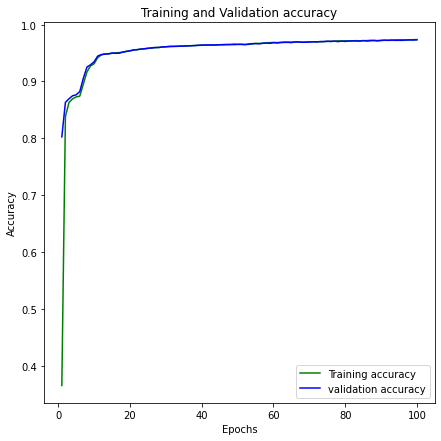

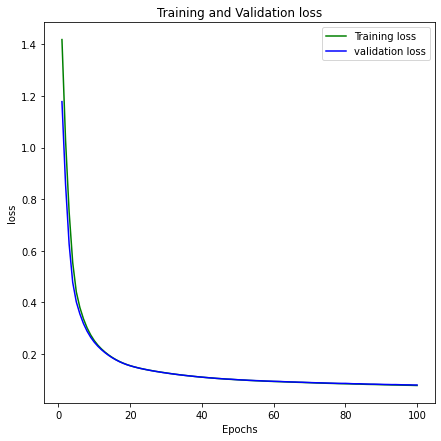

In [26]:
              
accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(accuracy)+1)

f = plt.figure()
f.set_figwidth(7)
f.set_figheight(7)

plt.plot(epochs, accuracy, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

f = plt.figure()
f.set_figwidth(7)
f.set_figheight(7)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

In [40]:
y_pred = mlp.predict(X_test)

985/985 [==============================] - 1s 1ms/step


In [112]:
pred = mlp.predict(X_test)

2631/2631 [==============================] - 3s 1ms/step


In [113]:
for j in range(0,pred.shape[1]):
  for i in range(0,pred.shape[0]):
    pred[i][j] = int(round(pred[i][j]))

In [114]:
pred_df = pd.DataFrame(pred,columns=y_test.columns)
print(f'Accuracy: {test_results[1]}')
print("Recall Score - ",recall_score(y_test,pred_df.astype('uint8'),average='micro'))
print("F1 Score - ",f1_score(y_test,pred_df.astype('uint8'),average='micro'))
print("Precision Score - ",precision_score(y_test,pred_df.astype('uint8'),average='micro'))
print("Log Loss - ",log_loss(y_test, pred))
print(f"Traing time: {end - begin}")

Accuracy: 0.9787120223045349
Recall Score -  0.977868589553214
F1 Score -  0.9788337138508371
Precision Score -  0.9798007451227786
Log Loss -  0.6994555678418766
Traing time: 25.358419179916382


In [115]:
# Testing time:
begin= time.time()
y_pred = mlp.predict(X_test)
end=time.time()
print(f"Testing time: {end - begin}")

2631/2631 [==============================] - 3s 1ms/step
Testing time: 4.158102989196777
